In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py

from shapely.geometry import Polygon
import contextily as ctx

from modules.data_aggregation.satellite_data import create_gdf, export_gdf, import_gdf_from_shp

# Importing processed satellite data

In [89]:
# import GeoDataFrame
gdf_Paris_import = import_gdf_from_shp("Paris")

In [90]:
gdf_Paris_import

,LST,ele,LST_diff,ele_diff,ul_corner,ll_corner,lr_corner,ur_corner,bb,geometry
0,28.489990,45.577309,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2633263464873545, 48.813839888049166]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2639559127237074, 48.81321032181281]]","[[2.2633263464873545, 48.81321032181281], [2.2...","POLYGON ((2.26333 48.81321, 2.26333 48.81384, ..."
1,28.549988,45.577431,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2645854789600603, 48.81321032181281]]","[[2.2639559127237074, 48.81321032181281], [2.2...","POLYGON ((2.26396 48.81321, 2.26396 48.81384, ..."
2,28.450012,46.947140,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2652150451964133, 48.813839888049166]]","[[2.2652150451964133, 48.81321032181281]]","[[2.2645854789600603, 48.81321032181281], [2.2...","POLYGON ((2.26459 48.81321, 2.26459 48.81384, ..."
3,29.230011,48.411678,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]","[[2.265844611432766, 48.813839888049166]]","[[2.265844611432766, 48.81321032181281]]","[[2.2652150451964133, 48.81321032181281], [2.2...","POLYGON ((2.26522 48.81321, 2.26522 48.81384, ..."
4,27.889984,48.643574,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]","[[2.266474177669119, 48.813839888049166]]","[[2.266474177669119, 48.81321032181281]]","[[2.265844611432766, 48.81321032181281], [2.26...","POLYGON ((2.26584 48.81321, 2.26584 48.81384, ..."
...,...,...,...,...,...,...,...,...,...,...
35023,34.149994,67.602211,3.344025,-6.159431,"[[2.4188292068665307, 48.90009046242952]]","[[2.4188292068665307, 48.90072002866587]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4194587731028836, 48.90009046242952]]","[[2.4188292068665307, 48.90009046242952], [2.4...","POLYGON ((2.41883 48.90009, 2.41883 48.90072, ..."
35024,33.750000,68.582405,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4200883393392365, 48.90009046242952]]","[[2.4194587731028836, 48.90009046242952], [2.4...","POLYGON ((2.41946 48.90009, 2.41946 48.90072, ..."
35025,33.750000,68.582405,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4207179055755894, 48.90009046242952]]","[[2.4200883393392365, 48.90009046242952], [2.4...","POLYGON ((2.42009 48.90009, 2.42009 48.90072, ..."
35026,32.690002,70.776123,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4213474718119423, 48.90072002866587]]","[[2.4213474718119423, 48.90009046242952]]","[[2.4207179055755894, 48.90009046242952], [2.4...","POLYGON ((2.42072 48.90009, 2.42072 48.90072, ..."


In [91]:
# import DataFrame
df_Paris_import = pd.read_csv('../../data/processed_data/Paris/Paris.csv')

In [92]:
from ast import literal_eval

first_pixel = df_Paris_import.bb.apply(literal_eval)[0]

In [93]:
first_pixel

[[2.2633263464873545, 48.81321032181281],
 [2.2633263464873545, 48.813839888049166],
 [2.2639559127237074, 48.813839888049166],
 [2.2639559127237074, 48.81321032181281]]

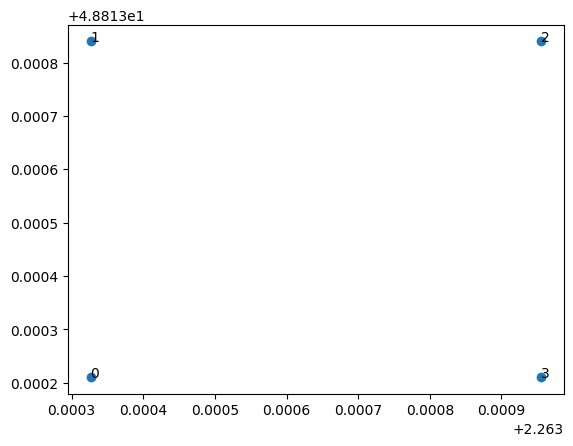

In [94]:
fig, ax = plt.subplots()

ax.scatter(np.array(first_pixel)[:,0], np.array(first_pixel)[:,1])

for i in range(4):
    ax.annotate(i, first_pixel[i])

In [4]:
# basic info

print(f"mean temp: {gdf_Paris_import.LST.mean()}, mean elevation: {gdf_Paris_import.ele.mean()}")
print(f"mean diff temp: {gdf_Paris_import.LST_diff.mean()}, mean diff elevation: {gdf_Paris_import.ele_diff.mean()}")
print(f"min temp: {gdf_Paris_import.LST.min()}, min elevation: {gdf_Paris_import.ele.min()}")
print(f"max temp: {gdf_Paris_import.LST.max()}, max elevation: {gdf_Paris_import.ele.max()}")
print(f"min diff temp: {gdf_Paris_import.LST_diff.min()}, min diff elevation: {gdf_Paris_import.ele_diff.min()}")
print(f"max diff temp: {gdf_Paris_import.LST_diff.max()}, max diff elevation: {gdf_Paris_import.ele_diff.max()}")


mean temp: 30.805967938400396, mean elevation: 73.76163836038451
mean diff temp: -1.2998808542451752e-06, mean diff elevation: -4.095670171452124e-06
min temp: 19.07000732421875, min elevation: 45.577308654785156
max temp: 41.329986572265625, max elevation: 135.3814697265625
min diff temp: -11.7359619140625, min diff elevation: -28.18433380126953
max diff temp: 10.524017333984375, max diff elevation: 61.61982727050781


# Importing raw satellite data 
has to be downloaded in '../../data/raw_data/{city_name}/*.h5'

In [9]:
# two different L2 files containing LST
lst_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L2_LSTE_23097_002_20220802T145219_0601_02.h5', 'r')

# L1 fille containing GPS coordinates
geo_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L1B_GEO_23097_002_20220802T145219_0601_01.h5', 'r')

# Creating processed data
(if raw data availabe)

In [86]:
# create GeoDataFrame
gdf_Paris = create_gdf("Paris")

In [87]:
gdf_Paris[1]['bb'][0]

[[2.2633263464873545, 48.81321032181281],
 [2.2633263464873545, 48.813839888049166],
 [2.2639559127237074, 48.813839888049166],
 [2.2639559127237074, 48.81321032181281]]

In [81]:
gdf_Paris[1]['bb'][0]

[[2.2639559127237074, 48.81321032181281],
 [2.2639559127237074, 48.813839888049166],
 [2.2633263464873545, 48.813839888049166],
 [2.2633263464873545, 48.81321032181281]]

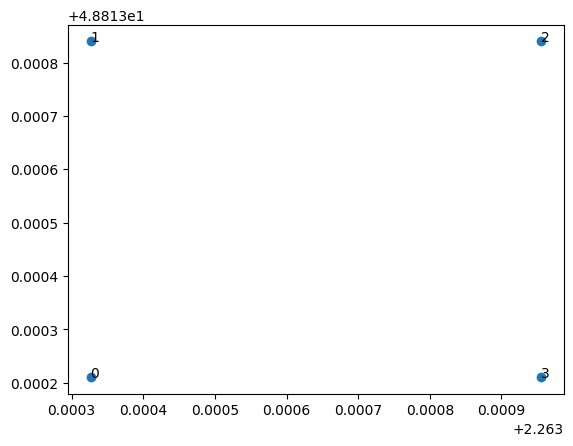

In [88]:
first_pixel = gdf_Paris[1].bb[0]
fig, ax = plt.subplots()
ax.scatter(np.array(first_pixel)[:,0], np.array(first_pixel)[:,1])

for i in range(4):
    ax.annotate(i, first_pixel[i])

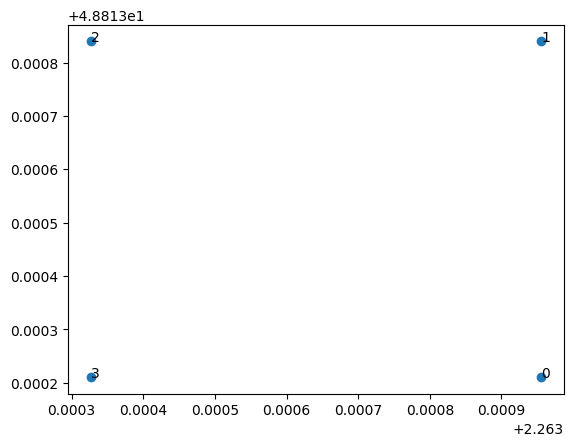

In [85]:
first_pixel = gdf_Paris[1].bb[0]
fig, ax = plt.subplots()
ax.scatter(np.array(first_pixel)[:,0], np.array(first_pixel)[:,1])

for i in range(4):
    ax.annotate(i, first_pixel[i])

In [ ]:
# create & export GeoDataFrame
export_gdf("Paris")

# Plotting

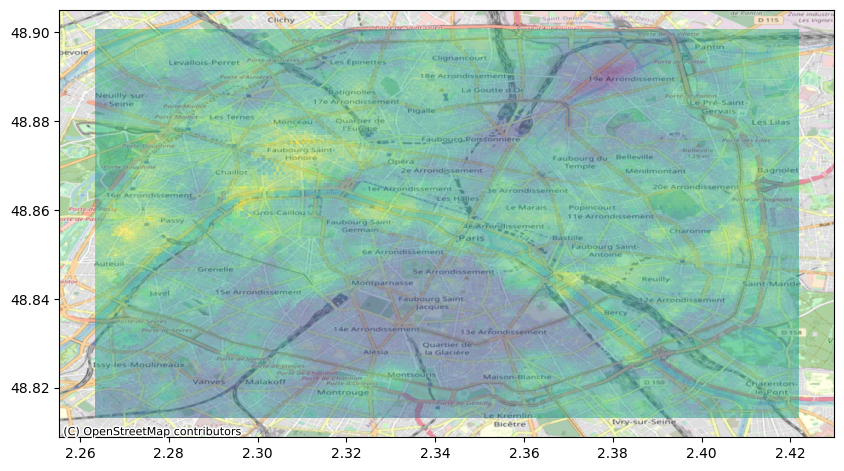

In [21]:
fig, ax = plt.subplots(figsize = (10,15))
gdf_Paris_import.plot(column = 'LST', ax = ax, alpha = .5)
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)